# **Automatidata project**

# Build a machine learning model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: Plan 


1. I am being asked to create a model, this time preferably ramdom forest model, to predict the customer behavior whether they will tip or not.
2. I am deeply concerned that informing the driver if the customer is likely to tip or not, specially if it is a false positive, will influence driver’s behavior toward the customer. Their attitude may become reckless which in effect will impact the company’s reputation.
In case of false positive, a customer might not tip if he is not pleased with the attitude of the driver.
In case of false negative, it might displease the driver, but otherwise no major impact.
3. No. I think the potential problems are greater.
4. I will proceed with it and build the model since this is the client's ask. Sincere there is no ethics violation such as discrimination, racial profiling, or class segregation. I would proceed with it.
5. Perhaps informing the driver is not the best idea, but depending on whether the customer will likely tip or not, the fare could be adjusted and used to compensate the driver.

In [1]:
# Import packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

ModuleNotFoundError: No module named 'pandas'

In [2]:
# RUN THIS CELL TO SEE ALL COLUMNS 
# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

In [3]:
# RUN THE CELL BELOW TO IMPORT YOUR DATA. 

# Load dataset into dataframe
df0 = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

# Import predicted fares and mean distance and duration from previous course
nyc_preds_means = pd.read_csv('nyc_preds_means.csv')

In [4]:
# Inspect the first few rows of df0
df0.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [ ]:
# Inspect the first few rows of `nyc_preds_means`

nyc_preds_means.head(10)

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642
5,11.855376,2.052258,10.441351
6,59.633333,12.830000,45.374542
7,26.437500,4.022500,18.555128
8,7.873457,1.019259,7.151511
9,10.541111,1.580000,9.122755


In [6]:
# Merge datasets
df1 = pd.concat([df0, nyc_preds_means], axis=1)
df1.drop(columns=['Unnamed: 0'], inplace=True)
df1.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare
0,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245
1,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218
2,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706
3,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650
4,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,14.616667,4.435000,15.845642
5,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,11.855376,2.052258,10.441351
6,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16,59.633333,12.830000,45.374542
7,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58,26.437500,4.022500,18.555128
8,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80,7.873457,1.019259,7.151511
9,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55,10.541111,1.580000,9.122755


<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               22699 non-null  int64  
 1   tpep_pickup_datetime   22699 non-null  object 
 2   tpep_dropoff_datetime  22699 non-null  object 
 3   passenger_count        22699 non-null  int64  
 4   trip_distance          22699 non-null  float64
 5   RatecodeID             22699 non-null  int64  
 6   store_and_fwd_flag     22699 non-null  object 
 7   PULocationID           22699 non-null  int64  
 8   DOLocationID           22699 non-null  int64  
 9   payment_type           22699 non-null  int64  
 10  fare_amount            22699 non-null  float64
 11  extra                  22699 non-null  float64
 12  mta_tax                22699 non-null  float64
 13  tip_amount             22699 non-null  float64
 14  tolls_amount           22699 non-null  float64
 15  im

You know from your EDA that customers who pay cash generally have a tip amount of $0. To meet the modeling objective, you'll need to sample the data to select only the customers who pay with credit card. 

Copy `df0` and assign the result to a variable called `df1`. Then, use a Boolean mask to filter `df1` so it contains only customers who paid with credit card.

In [ ]:
# Subset the data to isolate only customers who paid by credit card
df1 = df1[df1['payment_type'] == 1]


<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               15265 non-null  int64  
 1   tpep_pickup_datetime   15265 non-null  object 
 2   tpep_dropoff_datetime  15265 non-null  object 
 3   passenger_count        15265 non-null  int64  
 4   trip_distance          15265 non-null  float64
 5   RatecodeID             15265 non-null  int64  
 6   store_and_fwd_flag     15265 non-null  object 
 7   PULocationID           15265 non-null  int64  
 8   DOLocationID           15265 non-null  int64  
 9   payment_type           15265 non-null  int64  
 10  fare_amount            15265 non-null  float64
 11  extra                  15265 non-null  float64
 12  mta_tax                15265 non-null  float64
 13  tip_amount             15265 non-null  float64
 14  tolls_amount           15265 non-null  float64
 15  improve

In [ ]:

df1['payment_type'].unique()

##### **Target**

Notice that there isn't a column that indicates tip percent, which is what you need to create the target variable. You'll have to engineer it. 

Add a `tip_percent` column to the dataframe by performing the following calculation:  
<br/>  


$$tip\ percent = \frac{tip\ amount}{total\ amount - tip\ amount}$$  

Round the result to three places beyond the decimal. **This is an important step.** It affects how many customers are labeled as generous tippers. In fact, without performing this step, approximately 1,800 people who do tip ≥ 20% would be labeled as not generous. 

To understand why, you must consider how floats work. Computers make their calculations using floating-point arithmetic (hence the word "float"). Floating-point arithmetic is a system that allows computers to express both very large numbers and very small numbers with a high degree of precision, encoded in binary. However, precision is limited by the number of bits used to represent a number, which is generally 32 or 64, depending on the capabilities of your operating system. 

This comes with limitations in that sometimes calculations that should result in clean, precise values end up being encoded as very long decimals. Take, for example, the following calculation:


In [9]:
# Run this cell
1.1 + 2.2

3.3000000000000003

Notice the three that is 16 places to the right of the decimal. As a consequence, if you were to then have a step in your code that identifies values ≤ 3.3, this would not be included in the result. Therefore, whenever you perform a calculation to compute a number that is then used to make an important decision or filtration, round the number. How many degrees of precision you round to is your decision, which should be based on your use case. 

Refer to this [guide for more information related to floating-point arithmetic](https://floating-point-gui.de/formats/fp/).  

In [10]:
# Create tip % col
df1['tip_percent'] = round(df1['tip_amount'] / (df1['total_amount'] - df1['tip_amount']), 2)

Now create another column called `generous`. This will be the target variable. The column should be a binary indicator of whether or not a customer tipped ≥ 20% (0=no, 1=yes).

1. Begin by making the `generous` column a copy of the `tip_percent` column.
2. Reassign the column by converting it to Boolean (True/False).
3. Reassign the column by converting Boolean to binary (1/0).

In [11]:
# Create 'generous' col (target)
#df1['generous'] = np.where(df1['tip_percent'] > 0.2, 1, 0)
df1['generous'] = df1['tip_percent'].copy()
df1['generous'] = df1['generous'].apply(lambda x: True if x >= 0.2 else False)


In [12]:

df1['generous'] = df1['generous'].astype(int)

df1[df1['tip_percent'] > 0.2][['total_amount', 'tip_amount', 'tip_percent', 'generous']].head(10)

,total_amount,tip_amount,tip_percent,generous
1,20.80,4.00,0.24,1
3,27.69,6.39,0.30,1
11,72.92,14.58,0.25,1
14,22.85,4.55,0.25,1
19,16.00,3.20,0.25,1
23,10.35,2.05,0.25,1
25,12.09,2.79,0.30,1
39,13.30,5.00,0.60,1
43,9.12,1.82,0.25,1
45,12.85,2.55,0.25,1


<details>
  <summary><h5>HINT</h5></summary>

To convert from Boolean to binary, use `.astype(int)` on the column.
</details>

#### Create day column

Next, you're going to be working with the pickup and dropoff columns.

Convert the `tpep_pickup_datetime` and `tpep_dropoff_datetime` columns to datetime.

In [13]:
# Convert pickup and dropoff cols to datetime
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'], format = '%m/%d/%Y %I:%M:%S %p')
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'], format = '%m/%d/%Y %I:%M:%S %p')

df1[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].head(10)

,tpep_pickup_datetime,tpep_dropoff_datetime
0,2017-03-25 08:55:43,2017-03-25 09:09:47
1,2017-04-11 14:53:28,2017-04-11 15:19:58
2,2017-12-15 07:26:56,2017-12-15 07:34:08
3,2017-05-07 13:17:59,2017-05-07 13:48:14
5,2017-03-25 20:34:11,2017-03-25 20:42:11
6,2017-05-03 19:04:09,2017-05-03 20:03:47
7,2017-08-15 17:41:06,2017-08-15 18:03:05
9,2017-11-10 15:20:29,2017-11-10 15:40:55
10,2017-03-04 11:58:00,2017-03-04 12:13:12
11,2017-03-05 19:15:30,2017-03-05 19:52:18


Create a `day` column that contains only the day of the week when each passenger was picked up. Then, convert the values to lowercase.

In [14]:
# Create a 'day' col
df1['day'] = df1['tpep_pickup_datetime'].dt.day_name()


<details>
  <summary><h5>HINT</h5></summary>

To convert to day name, use `dt.day_name()` on the column.
</details>

#### Create time of day columns

Next, engineer four new columns that represent time of day bins. Each column should contain binary values (0=no, 1=yes) that indicate whether a trip began (picked up) during the following times:

`am_rush` = [06:00&ndash;10:00)  
`daytime` = [10:00&ndash;16:00)  
`pm_rush` = [16:00&ndash;20:00)  
`nighttime` = [20:00&ndash;06:00)  

To do this, first create the four columns. For now, each new column should be identical and contain the same information: the hour (only) from the `tpep_pickup_datetime` column.

In [15]:
# Create 'am_rush' col
df1['am_rush'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'daytime' col
df1['daytime'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'pm_rush' col
df1['pm_rush'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'nighttime' col
df1['nighttime'] = df1['tpep_pickup_datetime'].dt.hour

You'll need to write four functions to convert each new column to binary (0/1). Begin with `am_rush`. Complete the function so if the hour is between [06:00–10:00), it returns 1, otherwise, it returns 0.

In [16]:
# Define 'am_rush()' conversion function [06:00–10:00)
def am_rush(hour):
    if (hour >= 6) & (hour < 10):
        return 1
    else:
        return 0

Now, apply the `am_rush()` function to the `am_rush` series to perform the conversion. Print the first five values of the column to make sure it did what you expected it to do.

**Note:** Be careful! If you run this cell twice, the function will be reapplied and the values will all be changed to 0.

In [17]:
# Apply 'am_rush' function to the 'am_rush' series
df1['am_rush'] = df1['am_rush'].apply(am_rush)

Write functions to convert the three remaining columns and apply them to their respective series.

In [18]:
# Define 'daytime()' conversion function [10:00–16:00)
def daytime(hour):
    if (hour >= 10) & (hour < 16):
        return 1
    else:
        return 0

In [19]:
# Apply 'daytime()' function to the 'daytime' series
df1['daytime'] = df1['daytime'].apply(daytime)

In [20]:
# Define 'pm_rush()' conversion function [16:00–20:00)
def pm_rush(hour):
    if (hour >= 16) & (hour < 20):
        return 1
    else:
        return 0

In [21]:
# Apply 'pm_rush()' function to the 'pm_rush' series
df1['pm_rush'] = df1['pm_rush'].apply(pm_rush)

In [22]:
# Define 'nighttime()' conversion function [20:00–06:00)
def nighttime(hour):
    if (hour >= 20) | (hour< 6):
        return 1
    else:
        return 0

In [23]:
# Apply 'nighttime' function to the 'nighttime' series
df1['nighttime'] = df1['nighttime'].apply(nighttime)

#### Create `month` column

Now, create a `month` column that contains only the abbreviated name of the month when each passenger was picked up, then convert the result to lowercase.

<details>
  <summary><h5>HINT</h5></summary>

Refer to the [strftime cheatsheet](https://strftime.org/) for help.
</details>

In [24]:
# Create 'month' col
df1['month'] = df1['tpep_pickup_datetime'].dt.month_name()

Examine the first five rows of your dataframe.

In [25]:

df1['PU_DO'] = df1['PULocationID'].astype(str) + '_' + df1['DOLocationID'].astype(str)

df1['fare_rate'] = df1['predicted_fare'] / df1['mean_distance'] # due to mean distance 0, it can produce inf values which our models will not process.

# Replace inf values with default predicted_fare
df1['fare_rate'] = np.where(
    np.isinf(df1['fare_rate']),  # Condition: is infinity?
    df1['predicted_fare'],       # If True, use predicted_fare
    df1['fare_rate']             # If False, keep original fare_rate
)

df1['fare_rate'] = df1['fare_rate'].round(1)
df1['mean_duration'] = df1['mean_duration'].round(0)




In [26]:
df1.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous,day,am_rush,daytime,pm_rush,nighttime,month,PU_DO,fare_rate
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,23.0,3.521667,16.434245,0.20,1,Saturday,1,0,0,0,March,100_231,4.7
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,24.0,3.108889,16.052218,0.24,1,Tuesday,0,1,0,0,April,186_43,5.2
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7.0,0.881429,7.053706,0.20,1,Friday,1,0,0,0,December,262_236,8.0
3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,30.0,3.700000,18.731650,0.30,1,Sunday,0,1,0,0,May,188_97,5.1
5,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.00,0.3,12.36,12.0,2.052258,10.441351,0.20,1,Saturday,0,0,0,1,March,161_236,5.1
6,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.00,0.3,59.16,60.0,12.830000,45.374542,0.20,1,Wednesday,0,0,1,0,May,79_241,3.5
7,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.00,0.3,19.58,26.0,4.022500,18.555128,0.10,0,Tuesday,0,0,1,0,August,237_114,4.6
9,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.00,0.3,16.55,11.0,1.580000,9.122755,0.20,1,Friday,0,1,0,0,November,239_237,5.8
10,2,2017-03-04 11:58:00,2017-03-04 12:13:12,1,1.77,1,N,162,142,1,11.5,0.0,0.5,2.46,0.00,0.3,14.76,14.0,1.641000,10.147760,0.20,1,Saturday,0,1,0,0,March,162_142,6.2
11,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,40.0,19.211667,52.000000,0.25,1,Sunday,0,0,1,0,March,236_132,2.7


#### Drop columns

Drop redundant and irrelevant columns as well as those that would not be available when the model is deployed. This includes information like payment type, trip distance, tip amount, tip percentage, total amount, toll amount, etc. The target variable (`generous`) must remain in the data because it will get isolated as the `y` data for modeling.

In [27]:
# Drop columns
df1.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'payment_type', 'tip_amount', 'tip_percent', 'store_and_fwd_flag', 'tolls_amount', 
                  'improvement_surcharge', 'mta_tax','trip_distance','total_amount', 'mean_distance', 'predicted_fare', 'fare_amount', 'PU_DO'], inplace=True)


In [28]:
df1.head(10)

,VendorID,passenger_count,RatecodeID,PULocationID,DOLocationID,extra,mean_duration,generous,day,am_rush,daytime,pm_rush,nighttime,month,fare_rate
0,2,6,1,100,231,0.0,23.0,1,Saturday,1,0,0,0,March,4.7
1,1,1,1,186,43,0.0,24.0,1,Tuesday,0,1,0,0,April,5.2
2,1,1,1,262,236,0.0,7.0,1,Friday,1,0,0,0,December,8.0
3,2,1,1,188,97,0.0,30.0,1,Sunday,0,1,0,0,May,5.1
5,2,6,1,161,236,0.5,12.0,1,Saturday,0,0,0,1,March,5.1
6,2,1,1,79,241,1.0,60.0,1,Wednesday,0,0,1,0,May,3.5
7,2,1,1,237,114,1.0,26.0,0,Tuesday,0,0,1,0,August,4.6
9,1,1,1,239,237,0.0,11.0,1,Friday,0,1,0,0,November,5.8
10,2,1,1,162,142,0.0,14.0,1,Saturday,0,1,0,0,March,6.2
11,2,2,2,236,132,0.0,40.0,1,Sunday,0,0,1,0,March,2.7


#### Variable encoding

Many of the columns are categorical and will need to be dummied (converted to binary). Some of these columns are numeric, but they actually encode categorical information, such as `RatecodeID` and the pickup and dropoff locations. To make these columns recognizable to the `get_dummies()` function as categorical variables, you'll first need to convert them to `type(str)`. 

1. Define a variable called `cols_to_str`, which is a list of the numeric columns that contain categorical information and must be converted to string: `RatecodeID`, `PULocationID`, `DOLocationID`.
2. Write a for loop that converts each column in `cols_to_str` to string.


In [29]:
# 1. Define list of cols to convert to string
cols_to_convert = ['PULocationID', 'DOLocationID', 'RatecodeID']

def convert_to_string(df, cols):
    for col in cols:
        df[col]= df[col].astype(str)
    return df

convert_to_string(df1, cols_to_convert)

df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         15265 non-null  int64  
 1   passenger_count  15265 non-null  int64  
 2   RatecodeID       15265 non-null  object 
 3   PULocationID     15265 non-null  object 
 4   DOLocationID     15265 non-null  object 
 5   extra            15265 non-null  float64
 6   mean_duration    15265 non-null  float64
 7   generous         15265 non-null  int32  
 8   day              15265 non-null  object 
 9   am_rush          15265 non-null  int64  
 10  daytime          15265 non-null  int64  
 11  pm_rush          15265 non-null  int64  
 12  nighttime        15265 non-null  int64  
 13  month            15265 non-null  object 
 14  fare_rate        15265 non-null  float64
dtypes: float64(3), int32(1), int64(6), object(5)
memory usage: 1.8+ MB



<details>
  <summary><h5>HINT</h5></summary>

To convert to string, use `astype(str)` on the column.
</details>

Now convert all the categorical columns to binary.

1. Call `get_dummies()` on the dataframe and assign the results back to a new dataframe called `df2`.


In [30]:
# Convert categoricals to binary
df2 = pd.get_dummies(df1)

In [31]:
# bool_columns = df2.select_dtypes(include=['bool']).columns  # Identify bool columns
# df2[bool_columns] = df2[bool_columns].astype(int)  # Convert bool columns to int

In [32]:
df2.head(10)

,VendorID,passenger_count,extra,mean_duration,generous,am_rush,daytime,pm_rush,nighttime,fare_rate,RatecodeID_1,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_99,PULocationID_1,PULocationID_10,PULocationID_100,PULocationID_106,PULocationID_107,PULocationID_112,PULocationID_113,PULocationID_114,PULocationID_116,PULocationID_12,PULocationID_123,PULocationID_125,PULocationID_127,PULocationID_128,PULocationID_129,PULocationID_13,PULocationID_130,PULocationID_131,PULocationID_132,PULocationID_133,PULocationID_134,PULocationID_135,PULocationID_137,PULocationID_138,PULocationID_140,PULocationID_141,PULocationID_142,PULocationID_143,PULocationID_144,PULocationID_145,PULocationID_146,PULocationID_148,PULocationID_151,PULocationID_152,PULocationID_153,PULocationID_158,PULocationID_161,PULocationID_162,PULocationID_163,PULocationID_164,PULocationID_166,PULocationID_17,PULocationID_170,PULocationID_173,PULocationID_179,PULocationID_181,PULocationID_186,PULocationID_188,PULocationID_189,PULocationID_190,PULocationID_193,PULocationID_196,PULocationID_208,PULocationID_209,PULocationID_211,PULocationID_213,PULocationID_216,PULocationID_218,PULocationID_223,PULocationID_224,PULocationID_225,PULocationID_226,PULocationID_229,PULocationID_230,PULocationID_231,PULocationID_232,PULocationID_233,PULocationID_234,PULocationID_236,PULocationID_237,PULocationID_238,PULocationID_239,PULocationID_24,PULocationID_243,PULocationID_244,PULocationID_246,PULocationID_247,PULocationID_249,PULocationID_25,PULocationID_255,PULocationID_256,PULocationID_258,PULocationID_260,PULocationID_261,PULocationID_262,PULocationID_263,PULocationID_264,PULocationID_265,PULocationID_28,PULocationID_33,PULocationID_35,PULocationID_36,PULocationID_37,PULocationID_4,PULocationID_40,PULocationID_41,PULocationID_42,PULocationID_43,PULocationID_45,PULocationID_48,PULocationID_49,PULocationID_50,PULocationID_52,PULocationID_57,PULocationID_61,PULocationID_62,PULocationID_65,PULocationID_66,PULocationID_68,PULocationID_7,PULocationID_70,PULocationID_74,PULocationID_75,PULocationID_79,PULocationID_80,PULocationID_82,PULocationID_87,PULocationID_88,PULocationID_90,PULocationID_91,PULocationID_92,PULocationID_93,PULocationID_95,PULocationID_97,DOLocationID_1,DOLocationID_10,DOLocationID_100,DOLocationID_102,DOLocationID_106,DOLocationID_107,DOLocationID_11,DOLocationID_112,DOLocationID_113,DOLocationID_114,DOLocationID_116,DOLocationID_117,DOLocationID_118,DOLocationID_119,DOLocationID_12,DOLocationID_120,DOLocationID_121,DOLocationID_123,DOLocationID_124,DOLocationID_125,DOLocationID_126,DOLocationID_127,DOLocationID_129,DOLocationID_13,DOLocationID_130,DOLocationID_131,DOLocationID_132,DOLocationID_133,DOLocationID_134,DOLocationID_135,DOLocationID_136,DOLocationID_137,DOLocationID_138,DOLocationID_14,DOLocationID_140,DOLocationID_141,DOLocationID_142,DOLocationID_143,DOLocationID_144,DOLocationID_145,DOLocationID_146,DOLocationID_147,DOLocationID_148,DOLocationID_15,DOLocationID_151,DOLocationID_152,DOLocationID_153,DOLocationID_157,DOLocationID_158,DOLocationID_159,DOLocationID_16,DOLocationID_160,DOLocationID_161,DOLocationID_162,DOLocationID_163,DOLocationID_164,DOLocationID_166,DOLocationID_168,DOLocationID_169,DOLocationID_17,DOLocationID_170,DOLocationID_173,DOLocationID_174,DOLocationID_175,DOLocationID_177,DOLocationID_178,DOLocationID_179,DOLocationID_180,DOLocationID_181,DOLocationID_182,DOLocationID_183,DOLocationID_186,DOLocationID_188,DOLocationID_189,DOLocationID_19,DOLocationID_192,DOLocationID_193,DOLocationID_194,DOLocationID_195,DOLocationID_196,DOLocationID_197,DOLocationID_198,DOLocationID_200,DOLocationID_202,DOLocationID_208,DOLocationID_209,DOLocationID_21,DOLocationID_210,DOLocationID_211,DOLocationID_212,DOLocationID_213,DOLocationID_216,DOLocationID_217,DOLocationID_218,DOLocationID_22,DOLocationID_220,DOLocationID_223,DOLocationID_224,DOLocationID_225,DOLocationID_226,DOLocationID_228,DOLocationID_229,DOLocationID_23,DOLocationID_230,DOLoca

##### Evaluation metric

Before modeling, you must decide on an evaluation metric. 

1. Examine the class balance of your target variable. 

In [33]:
# Get class balance of 'generous' col
print(df2['generous'].value_counts())

# Calculate the ratio of non-generous to generous customers
generous_percent = df2['generous'].value_counts()[1] / (df2['generous'].value_counts()[1] + df2['generous'].value_counts()[0])
generous_percent

generous
1    10639
0     4626
Name: count, dtype: int64


0.6969538159187684

A little over half of the customers in this dataset were "generous" (tipped ≥ 20%). The dataset is very nearly balanced.

To determine a metric, consider the cost of both kinds of model error:
* False positives (the model predicts a tip ≥ 20%, but the customer does not give one)
* False negatives (the model predicts a tip < 20%, but the customer gives more)

False positives are worse for cab drivers, because they would pick up a customer expecting a good tip and then not receive one, frustrating the driver.

False negatives are worse for customers, because a cab driver would likely pick up a different customer who was predicted to tip more&mdash;even when the original customer would have tipped generously.

**The stakes are relatively even. You want to help taxi drivers make more money, but you don't want this to anger customers. Your metric should weigh both precision and recall equally. Which metric is this?**

F1

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3. Modeling**

##### **Split the data**

Now you're ready to model. The only remaining step is to split the data into features/target variable and training/testing data. 

1. Define a variable `y` that isolates the target variable (`generous`).
2. Define a variable `X` that isolates the features.
3. Split the data into training and testing sets. Put 20% of the samples into the test set, stratify the data, and set the random state.

In [34]:
# Isolate target variable (y)
y= df2['generous'].copy()

# Isolate the features (X)
X = df2.drop(columns=['generous'], axis=1).copy()

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)   

##### **Random forest**

Begin with using `GridSearchCV` to tune a random forest model.

1. Instantiate the random forest classifier `rf` and set the random state.

2. Create a dictionary `cv_params` of any of the following hyperparameters and their corresponding values to tune. The more you tune, the better your model will fit the data, but the longer it will take. 
 - `max_depth`  
 - `max_features`  
 - `max_samples` 
 - `min_samples_leaf`  
 - `min_samples_split`
 - `n_estimators`  

3. Define a set `scoring` of scoring metrics for GridSearch to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `rf1`. Pass to it as arguments:
 - estimator=`rf`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of you cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit=_`)


**Note:** `refit` should be set to `'f1'`.<font/>
</details>
 


In [35]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42, verbose=1)

# 2. Create a dictionary of hyperparameters to tune 
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5,10,15],
    'min_samples_split': [2,4,6],
    'min_samples_leaf': [1, 2],
    'max_samples': [0.4, 0.8],
    'max_features': ['log2']
}

# 3. Define a list of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# 4. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(estimator=rf, param_grid=params, scoring=scoring, refit='f1', cv=5, n_jobs=-1, verbose=1)

Now fit the model to the training data. Note that, depending on how many options you include in your search grid and the number of cross-validation folds you select, this could take a very long time&mdash;even hours. If you use 4-fold validation and include only one possible value for each hyperparameter and grow 300 trees to full depth, it should take about 5 minutes. If you add another value for GridSearch to check for, say, `min_samples_split` (so all hyperparameters now have 1 value except for `min_samples_split`, which has 2 possibilities), it would double the time to ~10 minutes. Each additional parameter would approximately double the time. 

In [36]:
rf_cv.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42, verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15], 'max_features': ['log2'],
                         'max_samples': [0.4, 0.8], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 200]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'},
             verbose=1)

<details>
  <summary><h5>HINT</h5></summary>

If you get a warning that a metric is 0 due to no predicted samples, think about how many features you're sampling with `max_features`. How many features are in the dataset? How many are likely predictive enough to give good predictions within the number of splits you've allowed (determined by the `max_depth` hyperparameter)? Consider increasing `max_features`.

</details>

If you want, use `pickle` to save your models and read them back in. This can be particularly helpful when performing a search over many possible hyperparameter values.

In [37]:
import pickle

In [38]:
path = r"C:\Users\mypro\OneDrive\Google Datascience Course\Project Files\Course_6_automatidata_project\Activity_Course 6 Automatidata project lab"

In [39]:
def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [40]:
def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

In [41]:
write_pickle(path, rf_cv, 'rf_model')
rf_cv = read_pickle(path, 'rf_model')

Examine the best average score across all the validation folds. 

In [42]:
# Examine best score
print("Best Score:", rf_cv.best_score_)

Best Score: 0.8214340843066846


Examine the best combination of hyperparameters.

In [43]:
print("Best Parameter: ", rf_cv.best_params_)

Best Parameter:  {'max_depth': 5, 'max_features': 'log2', 'max_samples': 0.4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments. 

<details>
  <summary><h5>HINT</h5></summary>

To learn more about how this function accesses the cross-validation results, refer to the [`GridSearchCV` scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV) for the `cv_results_` attribute.

</details>

In [44]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

Call `make_results()` on the GridSearch object.

In [45]:
make_results('Random Forest', rf_cv, 'f1')

,model,precision,recall,F1,accuracy
0,Random Forest,0.696978,1.0,0.821434,0.696978


Your results should produce an acceptable model across the board. Typically scores of 0.65 or better are considered acceptable, but this is always dependent on your use case. Optional: try to improve the scores. It's worth trying, especially to practice searching over different hyperparameters.

<details>
  <summary><h5>HINT</h5></summary>

For example, if the available values for `min_samples_split` were [2, 3, 4] and GridSearch identified the best value as 4, consider trying [4, 5, 6] this time.
</details>

Use your model to predict on the test data. Assign the results to a variable called `rf_preds`.

In [46]:

best_model = rf_cv.best_estimator_
rf_preds = best_model.predict(X_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


<details>
  <summary><h5>HINT</h5></summary>
    
You cannot call `predict()` on the GridSearchCV object directly. You must call it on the `best_estimator_`.
</details>

For this project, you will use several models to predict on the test data. Remember that this decision comes with a trade-off. What is the benefit of this? What is the drawback?

==> ENTER YOUR RESPONSE HERE

Use the below `get_test_scores()` function you will use to output the scores of the model on the test data.

In [47]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `rf_test_scores`.
2. Call `rf_test_scores` to output the results.

###### RF test results

In [48]:
 # Get scores on test data
rf_test_scores = get_test_scores('Random Forest', rf_preds, y_test)
rf_test_scores

,model,precision,recall,F1,accuracy
0,Random Forest,0.696882,1.0,0.821368,0.696882


**Question:** How do your test results compare to your validation results?

Quite similar

##### **XGBoost**

 Try to improve your scores using an XGBoost model.

1. Instantiate the XGBoost classifier `xgb` and set `objective='binary:logistic'`. Also set the random state.

2. Create a dictionary `cv_params` of the following hyperparameters and their corresponding values to tune:
 - `max_depth`
 - `min_child_weight`
 - `learning_rate`
 - `n_estimators`

3. Define a set `scoring` of scoring metrics for grid search to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `xgb1`. Pass to it as arguments:
 - estimator=`xgb`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit='f1'`)

In [49]:
from xgboost import XGBClassifier, plot_importance

# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(random_state=42, objective='binary:logistic', verbosity =0)

# 2. Create a dictionary of hyperparameters to tune
xgb_params = {
    'n_estimators': [100, 200, 400],
    'max_depth': [5, 6, 7],
    'min_child_weight': [3, 4, 5],
    'learning_rate': [0.03, 0.01],
}

# 3. Define a list of scoring metrics to capture
xgb_scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
}

# 4. Instantiate the GridSearchCV object
xgb1 = GridSearchCV(estimator=xgb, param_grid=xgb_params, scoring=xgb_scoring, refit='f1', cv=5, n_jobs=-1, verbose=1)



Now fit the model to the `X_train` and `y_train` data.

In [50]:

xgb_cv = xgb1.fit(X_train, y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


Get the best score from this model.

In [51]:
# Examine best score
print("Best Score: ", xgb_cv.best_score_)

print("Best Index", xgb_cv.best_index_)


Best Score:  0.8214763923201562
Best Index 45


And the best parameters.

In [52]:
# Examine best parameters
print("Best Parameter: ", xgb_cv.best_params_)

Best Parameter:  {'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 100}


##### XGB CV Results

Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments. 

In [53]:
# Call 'make_results()' on the GridSearch object
make_results('XGBoost', xgb_cv, 'f1')

,model,precision,recall,F1,accuracy
0,XGBoost,0.697039,1.0,0.821476,0.697065


In [54]:
xgb_cv.cv_results_

{'mean_fit_time': array([1.72257309, 2.32240572, 3.71534047, 1.82960067, 1.9715158 ,
        3.31381621, 1.19494505, 2.3224298 , 3.3389359 , 1.28120832,
        1.90841436, 3.45745635, 1.36318059, 1.98612013, 3.41771698,
        1.24220324, 1.89524589, 3.71404839, 1.28902493, 2.03768663,
        4.07654462, 1.30631518, 2.52180977, 4.46886263, 1.59652944,
        2.02926245, 3.6524838 , 1.30957384, 2.35436783, 3.52979364,
        1.27928071, 1.98427701, 3.55375028, 1.6273068 , 1.98322597,
        3.52324095, 1.3136909 , 1.99219561, 3.97736716, 1.31804361,
        2.11176133, 3.65134878, 1.71153903, 2.07352118, 3.62112312,
        1.37965918, 2.25887723, 3.87777233, 1.36933475, 2.1669868 ,
        3.71021862, 1.3004344 , 2.08078251, 2.74416771]),
 'std_fit_time': array([0.58455258, 0.14911735, 0.16363087, 0.05638607, 0.13050891,
        0.30564805, 0.06738703, 0.59406131, 0.1870473 , 0.16487884,
        0.05254248, 0.20028982, 0.21621262, 0.01836698, 0.09668772,
        0.07113491, 0.068

Use your model to predict on the test data. Assign the results to a variable called `xgb_preds`.

<details>
  <summary><h5>HINT</h5></summary>
    
You cannot call `predict()` on the GridSearchCV object directly. You must call it on the `best_estimator_`.
</details>

In [55]:
# Get scores on test data
xgb_preds = xgb_cv.best_estimator_.predict(X_test)

###### XGB test results

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `xgb_test_scores`.
2. Call `xgb_test_scores` to output the results.

In [56]:
# Get scores on test data
xgb_test_scores = get_test_scores('XGBoost', xgb_preds, y_test)
xgb_test_scores

,model,precision,recall,F1,accuracy
0,XGBoost,0.696882,1.0,0.821368,0.696882


**Question:** Compare these scores to the random forest test scores. What do you notice? Which model would you choose?

==> ENTER YOUR RESPONSE HERE

Plot a confusion matrix of the model's predictions on the test data.

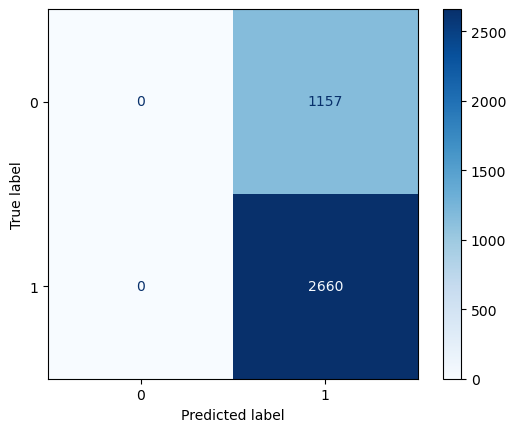

In [57]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, xgb_preds)

# Plot confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv.classes_)
display.plot(cmap=plt.cm.Blues, values_format='d')


**Question:** What type of errors are more common for your model?

==> ENTER YOUR RESPONSE HERE

##### Feature importance

Use the `feature_importances_` attribute of the best estimator object to inspect the features of your final model. You can then sort them and plot the most important ones.

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

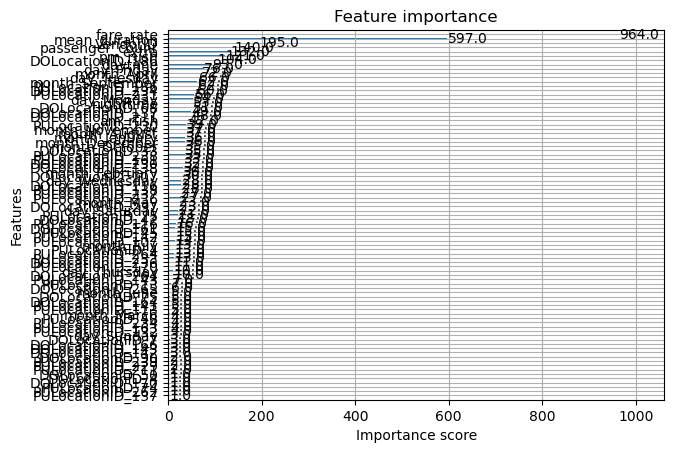

In [58]:
#==> ENTER YOUR CODE HERE
# Plot feature importance
plot_importance(xgb_cv.best_estimator_)

<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 4. Conclusion**

In this step, use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**  

2. **What was your model doing? Can you explain how it was making predictions?**   

3. **Are there new features that you can engineer that might improve model performance?**   

4. **What features would you want to have that would likely improve the performance of your model?**   

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion. Even if you cannot use the model to make strong predictions, was the work done in vain? Consider any insights that you could report back to stakeholders.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.